In [2]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
# Import Data
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Data Split
real_x = data.iloc[:,[2,3]].values
real_y = data.iloc[:,4]

In [5]:
# Traning and Testing Split
train_x,test_x,train_y,test_y = train_test_split(real_x,real_y,test_size=0.25,random_state=0)

In [6]:
## Standard Scalear
s_c = StandardScaler()
train_x = s_c.fit_transform(train_x)
test_x = s_c.fit_transform(test_x)

In [7]:
# Traning Classifier
cls = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
cls.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
# predict
y_pred = cls.predict(test_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [9]:
test_y

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

In [10]:
# Confusion Matrix 
c_m = confusion_matrix(test_y,y_pred)
c_m

array([[64,  4],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


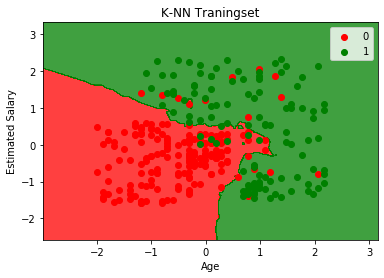

In [11]:
# Visulize Traning Data
from matplotlib.colors import ListedColormap
x_set,y_set = train_x,train_y
x1,x2 = np.meshgrid( 
            np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
            np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01)    
            )

plt.contourf(x1,x2,cls.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green'))
            )
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

plt.title('K-NN Traningset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


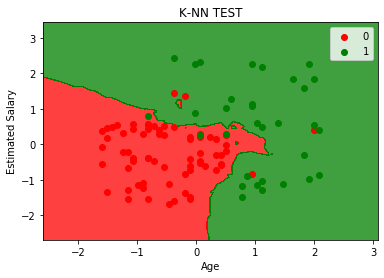

In [12]:
# Visulize Traning Data
x_set,y_set = test_x,test_y
x1,x2 = np.meshgrid( 
            np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
            np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01)    
            )

plt.contourf(x1,x2,cls.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green'))
            )
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

plt.title('K-NN TEST')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()